In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk import sent_tokenize

In [103]:
questions =  pd.read_parquet('/Users/hungnguyen/Masters/StackOverFlow-MBDProject/data/questions-with-ans-and-metrics-cluster-small.parquet')

In [104]:
questions.head()

,_Id,_PostTypeId,_AcceptedAnswerId,_CreationDate,_Score,_ViewCount,_Body,_Title,_Tags,_AnswerCount,...,AnswerDurationDays,AnswerDurationMinute,AnswerDurationHour,Flesch_Kincard_Grade,Flesch_reading_ease,Coleman_Liau_index,code_percentage,cos_sim_post_title,cos_sim_title_tag,sentiment
0,72715314,1,72715981,2022-06-22 10:16:19.833,1,616,"<p>quick introduction, I came from python I ha...",run specific .rs file,<rust><clion><rust-cargo>,2,...,0,42.866667,0.714444,6.531002044989776,80.49639400136336,11.893496932515337,0.06444188722669736,0.048349513466823826,0.0,-0.6845
1,66994227,1,67062944,2021-04-07 19:18:24.673,3,16027,"<p>I'm tried to follow this <a href=""https://p...",Kibana startup fails with License information ...,<elasticsearch><amazon-ec2><centos><kibana>,4,...,5,6967.083333,116.118056,13.385444015444016,36.753378378378386,25.628648648648653,0.06260869565217392,0.17103633876398908,0.05699752852140605,-0.2549
2,70243250,1,70243511,2021-12-06 08:23:41.427,2,109,<p>I have a dataframe with a column containing...,substring replacement based on condition -python,<python><regex>,2,...,0,23.050000,0.384167,14.738095238095237,34.43440677966106,23.09310734463276,0,0.009203347542474833,0.1757860783933462,0.9211
3,69527128,1,69595134,2021-10-11 11:35:46.533,2,1027,"<p>Lets say this is my HTML, created from usin...",How to test parent child relationship in react...,<reactjs><react-testing-library>,1,...,5,7068.433333,117.807222,18.758518518518517,8.663333333333355,29.054814814814815,0.0220162224797219,0.11758134532680156,0.3278707471841718,0.8979
4,67585433,1,67594199,2021-05-18 09:39:41.537,1,49,<p>I've got two models with ActiveAdmin panels...,Rails ActiveAdmin link_to new model inside dif...,<ruby-on-rails><activeadmin>,1,...,0,592.366667,9.872778,34.745000000000005,-42.7225,36.176,0.021071115013169446,0.08567821715850064,0.20608363501393823,0.2023


In [105]:
questions.count()

_Id                           103444
_PostTypeId                   103444
_AcceptedAnswerId             103444
_CreationDate                 103444
_Score                        103444
_ViewCount                    103444
_Body                         103444
_Title                        103444
_Tags                         103444
_AnswerCount                  103444
_CommentCount                 103444
_FavoriteCount                 10275
AnswerId                      103444
AcceptedAnswerText            103444
AcceptedAnswerCreationDate    103444
TagsList                      103444
metrics                       103444
AnswerDurationSeconds         103444
AnswerDurationDays            103444
AnswerDurationMinute          103444
AnswerDurationHour            103444
Flesch_Kincard_Grade          103444
Flesch_reading_ease           103444
Coleman_Liau_index            103444
code_percentage               103444
cos_sim_post_title            103444
cos_sim_title_tag             103444
s

([<matplotlib.axis.XTick at 0x2a7d48b50>,
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0'),
  Text(20, 0, '21.0'),
  Text(21, 0, '22.0'),
  Text(22, 0, '23.0'),
  Text(23, 0, '24.0')])

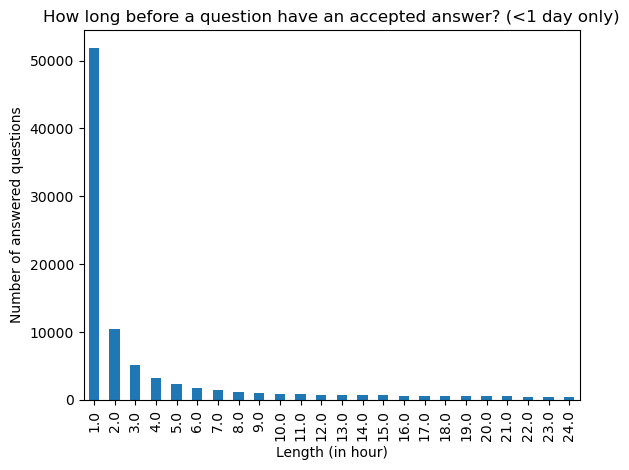

In [106]:
max_hour = questions.AnswerDurationHour.max()
x = 'AnswerDurationHour'
binsHr = np.linspace(0, 24, 25).tolist()
questions['binsHr'] = pd.cut(questions[x], bins=binsHr, include_lowest=True)
questions.groupby('binsHr')[x].count().plot.bar()
plt.title('How long before a question have an accepted answer? (<1 day only)')
plt.xlabel('Length (in hour)')
plt.ylabel('Number of answered questions')
binsHrTick = np.linspace(1, 24, 24).tolist()
plt.xticks(list(range(len(binsHrTick))), binsHrTick)


-40.9 981070.5666666667


([<matplotlib.axis.XTick at 0x2c53de5c0>,
 [Text(0, 0, '1'),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, '5'),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, '10'),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, ''),
  Text(13, 0, ''),
  Text(14, 0, '15'),
  Text(15, 0, ''),
  Text(16, 0, ''),
  Text(17, 0, ''),
  Text(18, 0, ''),
  Text(19, 0, '20'),
  Text(20, 0, ''),
  Text(21, 0, ''),
  Text(22, 0, ''),
  Text(23, 0, ''),
  Text(24, 0, '25'),
  Text(25, 0, ''),
  Text(26, 0, ''),
  Text(27, 0, ''),
  Text(28, 0, ''),
  Text(29, 0, '30'),
  Text(30, 0, ''),
  Text(31, 0, ''),
  Text(32, 0, ''),
  Text(33, 0, ''),
  Text(34, 0, '35'),
  Text(35, 0, ''),
  Text(36, 0, ''),
  Text(37, 0, ''),
  Text(38, 0, ''),
  Text(39, 0, '40'),
  Text(40, 0, ''),
  Text(41, 0, ''),
  Text(42, 0, ''),
  Text(43, 0, ''),
  Text(44, 0, '45'),
  Text(45, 0, ''),
  Text(46, 0, ''),
  Text(47, 0, ''),
  Text(48, 0, ''),
  Text(49, 0, '50')

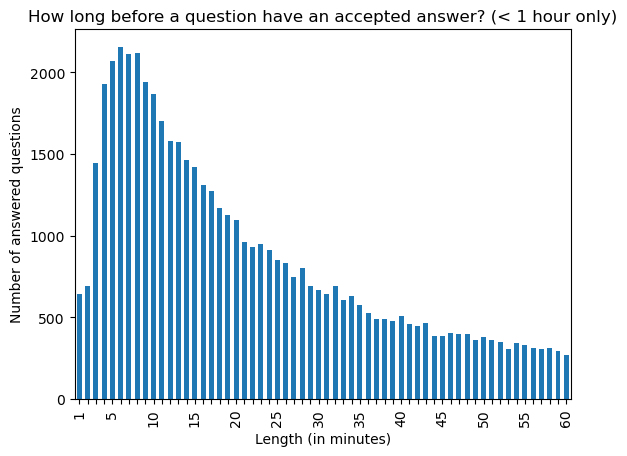

In [107]:
max_minutes = questions.AnswerDurationMinute.max()
min_minutes = questions.AnswerDurationMinute.min()
print(min_minutes, max_minutes)
binsMin = np.linspace(0, 60, 61).tolist()
list_printed = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
binsTick = [1, None, None, None]
for i in range(len(list_printed)):
    binsTick.append(list_printed[i])
    for _ in range(4):
        binsTick.append(None)
binsTick.append(60)

questions['binsMin'] = pd.cut(questions.AnswerDurationMinute, bins=binsMin, include_lowest=True)
questions.groupby('binsMin')['AnswerDurationMinute'].count().plot(kind='bar', width=0.6)
plt.title('How long before a question have an accepted answer? (< 1 hour only)')
plt.xlabel('Length (in minutes)')
plt.ylabel('Number of answered questions')
plt.xticks(list(range(len(binsTick))), binsTick)



In [126]:
questions[['Flesch_Kincard_Grade', 'Flesch_reading_ease', 'Coleman_Liau_index', 'code_percentage', 'cos_sim_post_title', 'cos_sim_title_tag', 'AnswerDurationMinute', 'sentiment']] = questions[['Flesch_Kincard_Grade', 'Flesch_reading_ease', 'Coleman_Liau_index', 'code_percentage', 'cos_sim_post_title', 'cos_sim_title_tag', 'AnswerDurationMinute','sentiment']].astype('float')

In [132]:


questions[questions.AnswerDurationDays > 1][['code_percentage', 'cos_sim_post_title', 'cos_sim_title_tag', 'AnswerDurationMinute', '_Score', '_ViewCount', 'Flesch_reading_ease', 'sentiment', 'Flesch_reading_ease']].corr()

,code_percentage,cos_sim_post_title,cos_sim_title_tag,AnswerDurationMinute,_Score,_ViewCount,Flesch_reading_ease,sentiment,Flesch_reading_ease
code_percentage,1.000000,0.010920,-0.001080,0.013981,0.038377,0.015838,0.147903,-0.049893,0.147903
cos_sim_post_title,0.010920,1.000000,0.048011,0.050094,0.024328,0.034735,0.213143,-0.022298,0.213143
cos_sim_title_tag,-0.001080,0.048011,1.000000,0.041283,-0.001132,0.008387,0.013336,-0.016861,0.013336
AnswerDurationMinute,0.013981,0.050094,0.041283,1.000000,0.067879,0.054667,0.022369,-0.011585,0.022369
_Score,0.038377,0.024328,-0.001132,0.067879,1.000000,0.693320,-0.063822,-0.030645,-0.063822
_ViewCount,0.015838,0.034735,0.008387,0.054667,0.693320,1.000000,-0.066734,-0.045690,-0.066734
Flesch_reading_ease,0.147903,0.213143,0.013336,0.022369,-0.063822,-0.066734,1.000000,0.107219,1.000000
sentiment,-0.049893,-0.022298,-0.016861,-0.011585,-0.030645,-0.045690,0.107219,1.000000,0.107219
Flesch_reading_ease,0.147903,0.213143,0.013336,0.022369,-0.063822,-0.066734,1.000000,0.107219,1.000000


682


Text(0, 0.5, 'Number of answered questions')

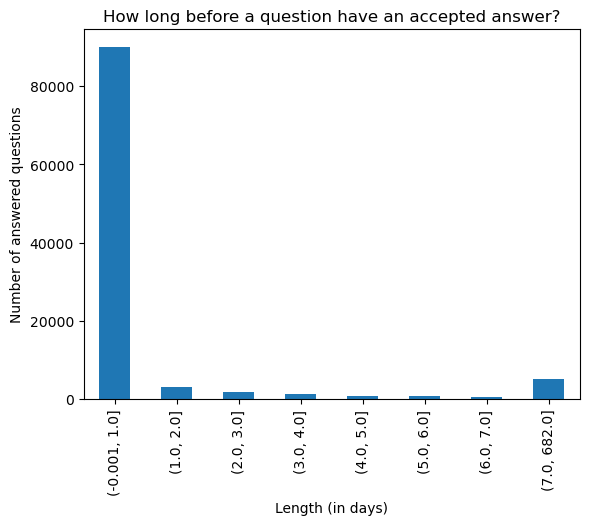

In [110]:
max_days = questions.AnswerDurationDays.max()
print(max_days)

binsDay = [0, 1, 2, 3, 4, 5, 6, 7, max_days]
questions['binsDay'] = pd.cut(questions.AnswerDurationDays, bins=binsDay,include_lowest=True)
# plt.xticks(bins)
questions.groupby('binsDay')['AnswerDurationDays'].count().plot.bar()
plt.title('How long before a question have an accepted answer?')
plt.xlabel('Length (in days)')
plt.ylabel('Number of answered questions')
# plt.xticks(list(range(len(binsDay))), binsDay)


[0, 1, 6.0, 12.0, 18.0, 24.0, 30.0, 36.0, 42.0, 48.0, 54.0, 60.0]


Text(0, 0.5, 'Number of answered questions')

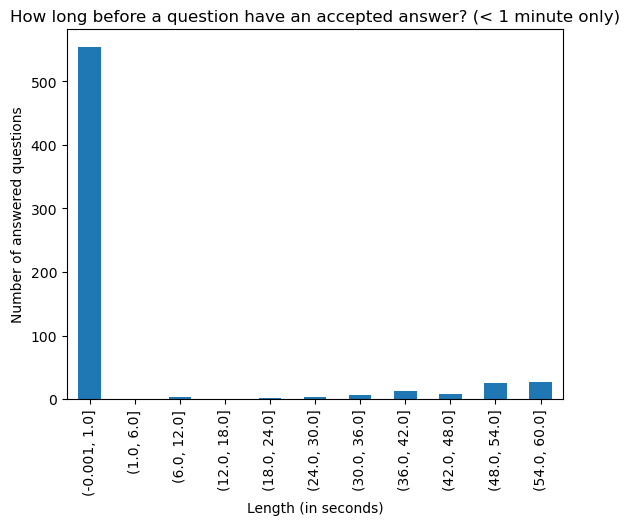

In [111]:
binsSec = [0, 1]
binsSec += np.linspace(6, 60, 10).tolist()
print(binsSec)
questions['binsSec'] = pd.cut(questions.AnswerDurationSeconds, bins=binsSec, include_lowest=True)
questions.groupby('binsSec')['AnswerDurationSeconds'].count().plot.bar()
plt.title('How long before a question have an accepted answer? (< 1 minute only)')
plt.xlabel('Length (in seconds)')
plt.ylabel('Number of answered questions')
# plt.xticks(list(range(len(binsSec))), binsSec)


0.9804899995909853


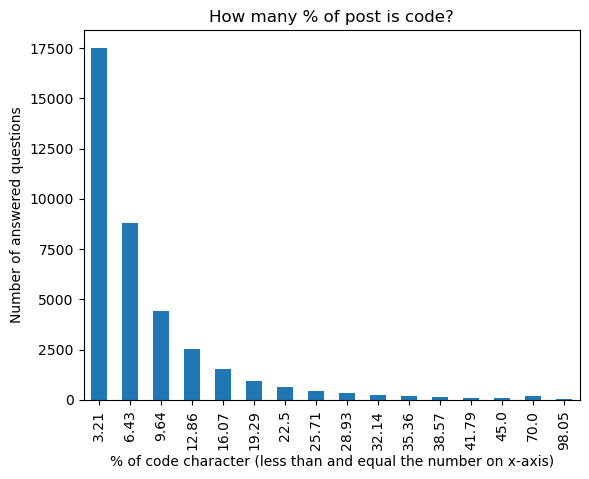

In [124]:
max_codes = questions.code_percentage.max()
print(max_codes)
binsCode = np.linspace(0, 0.45, 15).tolist() + np.linspace(0.7, max_codes, 2).tolist()
binsCode_tick = []
for elem in binsCode:
    if elem == 0:
        continue
    binsCode_tick.append(round(elem * 100, 2))
questions['binsCode'] = pd.cut(questions.code_percentage, bins=binsCode)
# plt.xticks(bins)
questions.groupby('binsCode')['code_percentage'].count().plot.bar()
plt.title('How many % of post is code?')
plt.xlabel('% of code character (less than and equal the number on x-axis)')
plt.ylabel('Number of answered questions')
plt.xticks(list(range(len(binsCode_tick))), binsCode_tick)
plt.savefig('/Users/hungnguyen/Masters/StackOverFlow-MBDProject/fig/codeper.png')


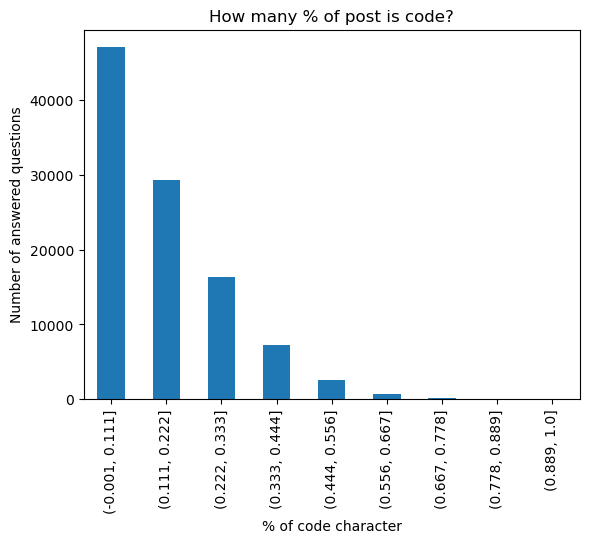

In [121]:
max_cstt = questions.cos_sim_title_tag.max()
min_cstt = questions.cos_sim_title_tag.min()
binscstt = np.linspace(min_cstt, max_cstt, 10).tolist()

questions['binscstt'] = pd.cut(questions.cos_sim_title_tag, bins=binscstt, include_lowest=True)
# plt.xticks(bins)
questions.groupby('binscstt')['cos_sim_title_tag'].count().plot.bar()
plt.title('How many % of post is code?')
plt.xlabel('% of code character')
plt.ylabel('Number of answered questions')

167.54729020979022 -3353.560757575757


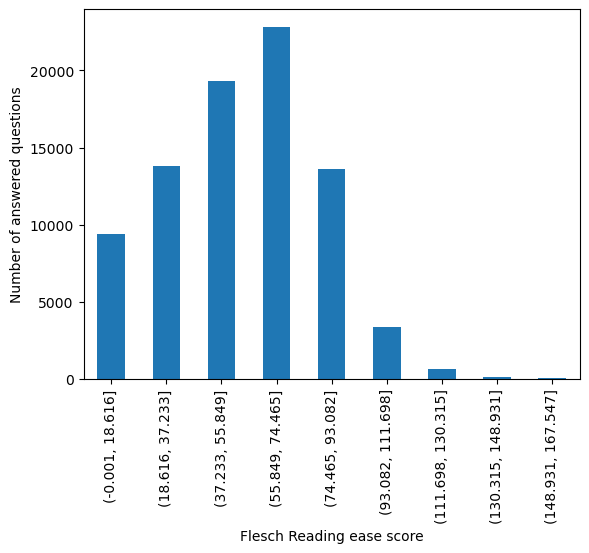

In [122]:
max_FRE = questions.Flesch_reading_ease.max()
min_FRE = questions.Flesch_reading_ease.min()
# binsfre = np.linspace(-192, -17, 2).tolist() + np.linspace(-16, 114, 10).tolist() + np.linspace(115, max_FRE, 2).tolist()
print(max_FRE, min_FRE)
binsfre = np.linspace(0, max_FRE, 10).tolist()
questions['binsfre'] = pd.cut(questions.Flesch_reading_ease, bins=binsfre, include_lowest=True)
# plt.xticks(bins)
questions.groupby('binsfre')['Flesch_reading_ease'].count().plot.bar()
plt.xlabel('Flesch Reading ease score')
plt.ylabel('Number of answered questions')
plt.savefig('/Users/hungnguyen/Masters/StackOverFlow-MBDProject/fig/fre.png')


634.3570093457944 -9.448412928759893


Text(0, 0.5, 'Number of answered questions')

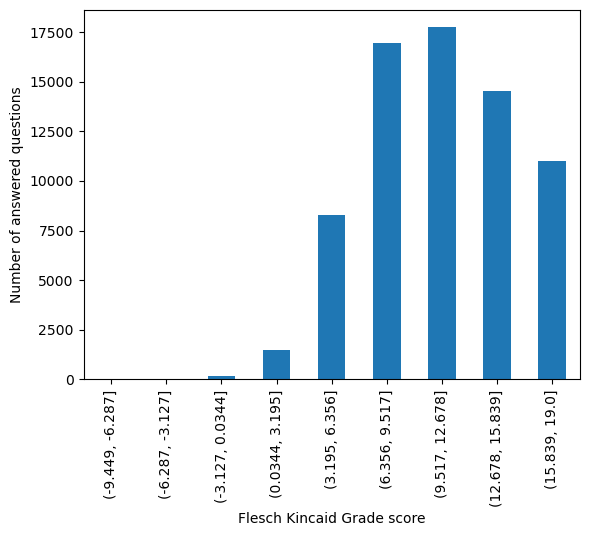

In [117]:
max_FKG = questions.Flesch_Kincard_Grade.max()
min_FKG = questions.Flesch_Kincard_Grade.min()
binsFKG = np.linspace(min_FKG, 19, 10).tolist()
print(max_FKG, min_FKG)
questions['binsFKG'] = pd.cut(questions.Flesch_Kincard_Grade, bins=binsFKG, include_lowest=True)
# plt.xticks(bins)
questions.groupby('binsFKG')['Flesch_Kincard_Grade'].count().plot.bar()
plt.xlabel('Flesch Kincaid Grade score')
plt.ylabel('Number of answered questions')

1485.7245454545457 -7.140474934036941


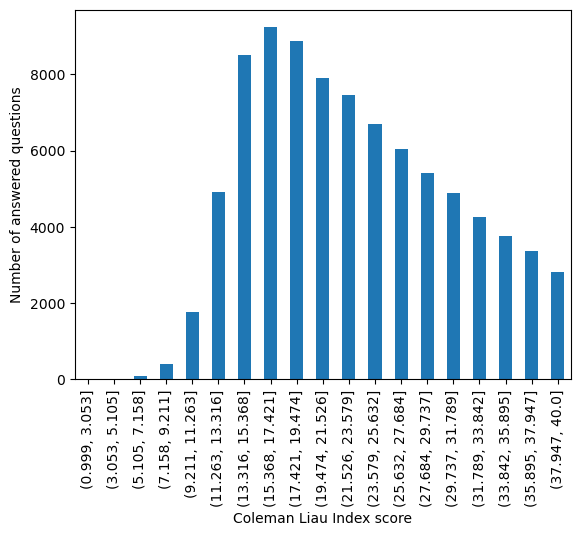

In [123]:
max_CLI = questions.Coleman_Liau_index.max()
min_CLI = questions.Coleman_Liau_index.min()
print(max_CLI, min_CLI)
binsCLI = np.linspace(1, 40, 20).tolist()

questions['binsCLI'] = pd.cut(questions.Coleman_Liau_index, bins=binsCLI, include_lowest=True)
# plt.xticks(bins)
questions.groupby('binsCLI')['Coleman_Liau_index'].count().plot.bar()
plt.xlabel('Coleman Liau Index score')
plt.ylabel('Number of answered questions')


1.0 -1.0


Text(0, 0.5, 'Number of answered questions')

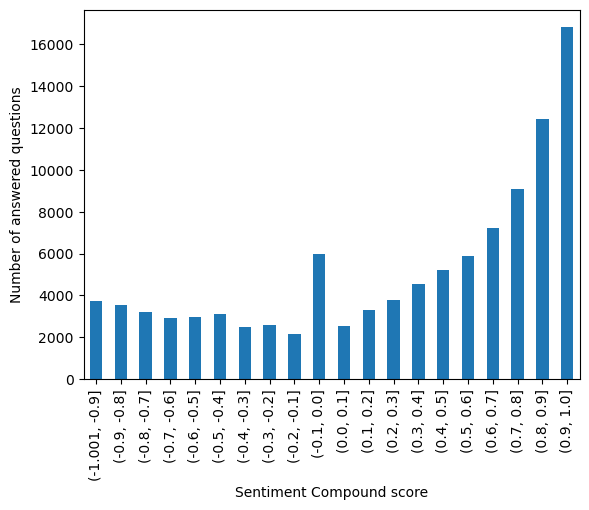

In [133]:
max_sent = questions.sentiment.max()
min_sent = questions.sentiment.min()
print(max_sent, min_sent)
bins_sent = np.linspace(-1, 1, 21).tolist()

questions['bins_sent'] = pd.cut(questions.sentiment, bins=bins_sent, include_lowest=True)
# plt.xticks(bins)
questions.groupby('bins_sent')['sentiment'].count().plot.bar()
plt.xlabel('Sentiment Compound score')
plt.ylabel('Number of answered questions')

In [139]:
questions[questions.sentiment < -0.9].iloc[1]._Body


'<p>I want to round my timestamp to the day. Following this <a href="https://stackoverflow.com/a/9680244/1290485">answer</a>. But I am getting an error.</p>\n<pre><code>Select date_format(timestamp, \'%Y-%m-%d\') as day\n</code></pre>\n<p>Error:</p>\n<pre><code>org.apache.hive.service.cli.HiveSQLException: Error running query: org.apache.spark.SparkException: Job aborted due to stage failure: Task 82 in stage 9847.0 failed 4 times, most recent failure: Lost task 82.3 in stage 9847.0 (TID 225269) (10.139.66.255 executor 2): org.apache.spark.SparkUpgradeException: You may get a different result due to the upgrading of Spark 3.0: Fail to recognize \'%Y-%m-%d\' pattern in the DateTimeFormatter. 1) You can set legacy_time_parser_policy to LEGACY to restore the behavior before Spark 3.0. 2) You can form a valid datetime pattern with the guide from https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html\n    at 0x44ede16 &lt;photon&gt;.ColExprFromProtoImpl(external/workspace_spark_